In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import warnings 
warnings.filterwarnings("ignore") # GP struggles to converge sometimes, ignored for now

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import random
import networkx as nx

In [29]:
import numpy as np
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=2, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [11]:
# import numpy as np
# X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
# y = np.squeeze(X * np.sin(X))

# rng = np.random.RandomState(1)
# training_indices = rng.choice(np.arange(y.size), size=3, replace=False)
# X_train, y_train = X[training_indices], y[training_indices]

# temp = np.zeros((6,1))
# temp[0:3], temp[3:6] = X_train, X_train
# X_train = temp
# temp = np.zeros((6,))
# temp[0:3], temp[3:6] = y_train, y_train
# y_train = temp

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF

# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gaussian_process2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# gaussian_process2.fit(X_train, y_train)

In [9]:
# mean, std = gaussian_process.predict(X, return_std=True)
# mean2, std2 = gaussian_process2.predict(X, return_std=True)

In [10]:
# fig, axs = plt.subplots(1,2,figsize=(6.66,3))
# axes = axs.flatten()

# plt.sca(axes[0])
# plt.plot(X, mean, color='blue')
# plt.title('Non-Duplicated Data')
# plt.sca(axes[1])
# plt.plot(X, mean2, color='red')
# plt.title('Duplicated Data')

# plt.show()

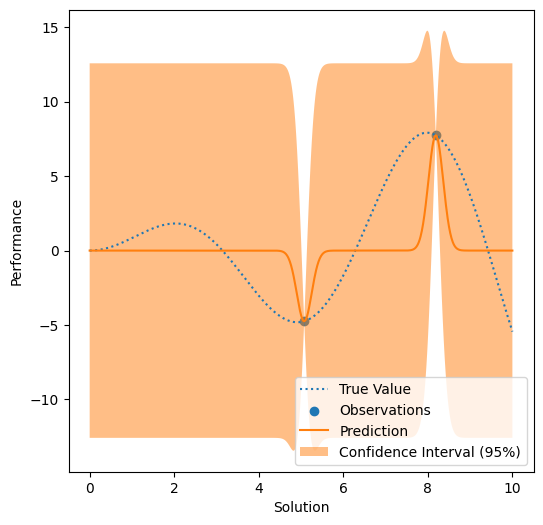

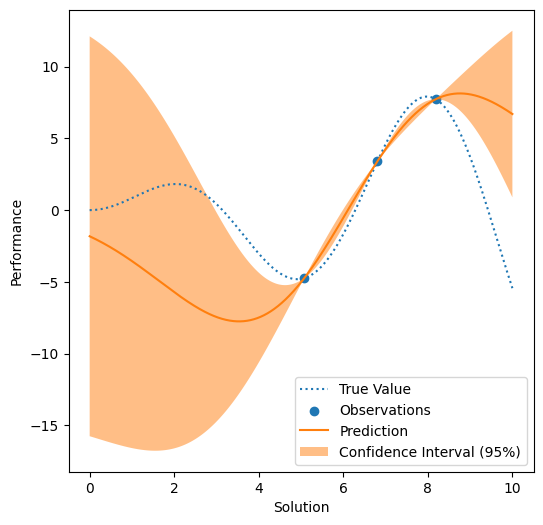

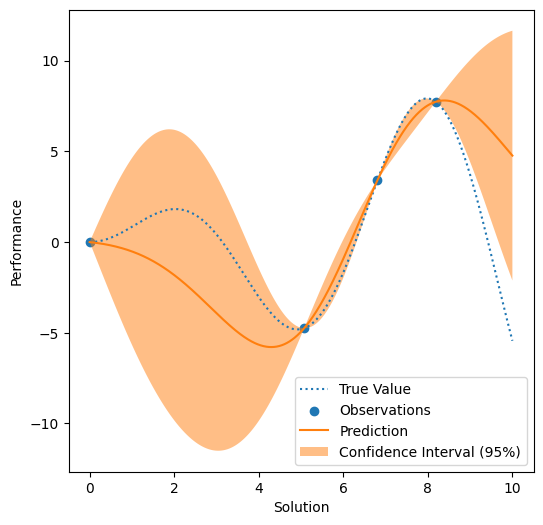

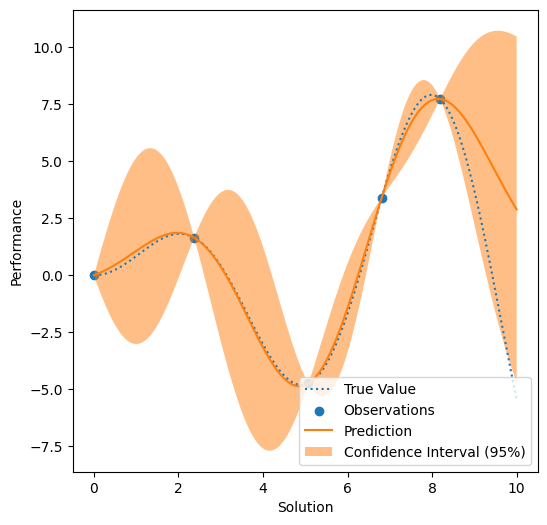

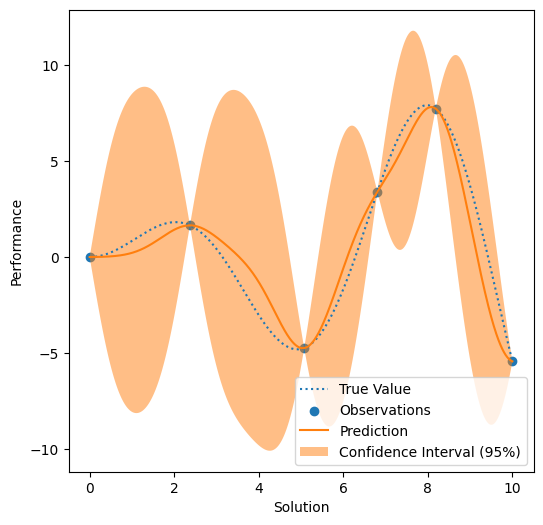

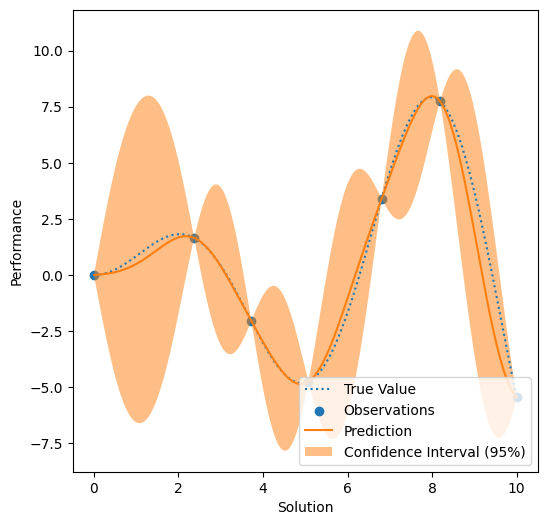

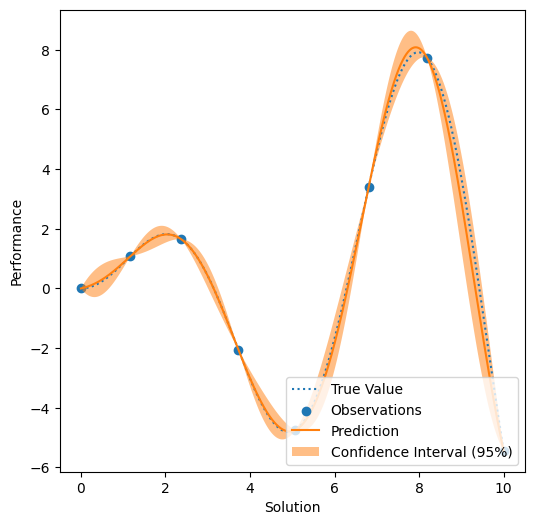

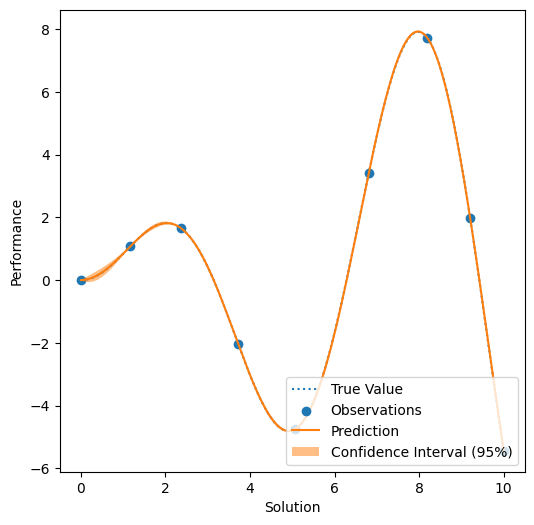

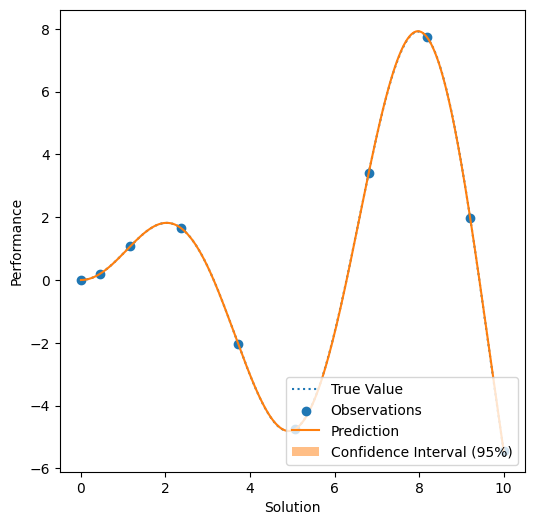

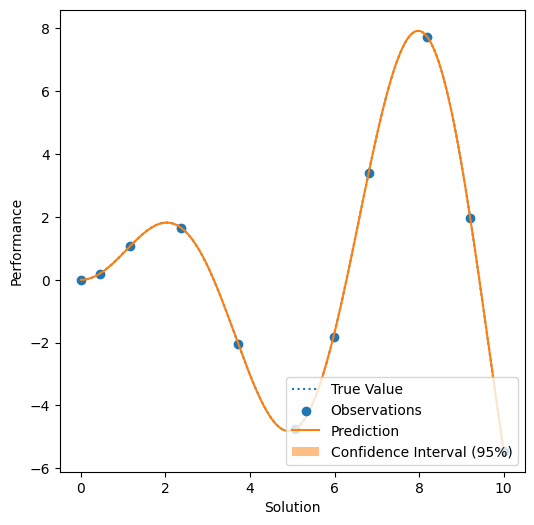

In [30]:
for i in range(10):
    gaussian_process.fit(X_train, y_train)
    mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)
    
    fig = plt.figure(figsize=(6,6))
    
    plt.plot(X, y, label=r"True Value", linestyle="dotted")
    plt.scatter(X_train, y_train, label="Observations")
    plt.plot(X, mean_prediction, label="Prediction")
    plt.fill_between(
        X.ravel(),
        mean_prediction - 1.96 * std_prediction,
        mean_prediction + 1.96 * std_prediction,
        alpha=0.5,
        label=r"Confidence Interval (95%)",
    )
    plt.legend(loc='lower right')
    plt.xlabel("Solution")
    plt.ylabel("Performance")
    # _ = plt.title("Gaussian Process Regression")
    plt.savefig(f'images/image0{i}.png')
    plt.show()
    
    ub = mean_prediction + 1.96*std_prediction
    lb = mean_prediction - 1.96*std_prediction
    stds = ub - lb
    new_x = np.where(stds==sorted(stds)[-1])
    new_x = random.choices(new_x[0], k=1)
    X_train = np.concatenate((X_train,X[new_x].reshape(-1,1)))
    y_train = np.concatenate((y_train,y[new_x]))

MovieWriter Pillow unavailable; using Pillow instead.


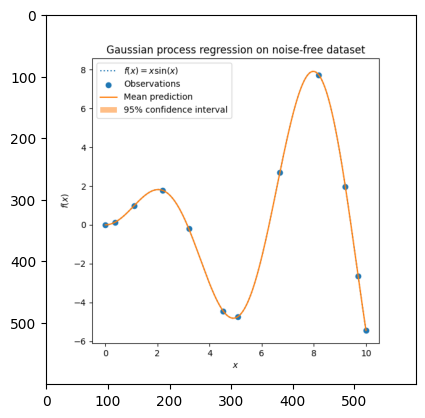

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import os

files = ['images/'+file for file in sorted(os.listdir(f'images')) if 'image' in file]
# files = sorted(files, key=lambda x: int(x.split('_')[2].split('.')[0]))

images = [plt.imread(file) for file in files] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for image in images:
    frames.append([plt.imshow(image, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('animation.gif', writer='Pillow', fps=2)
plt.show()

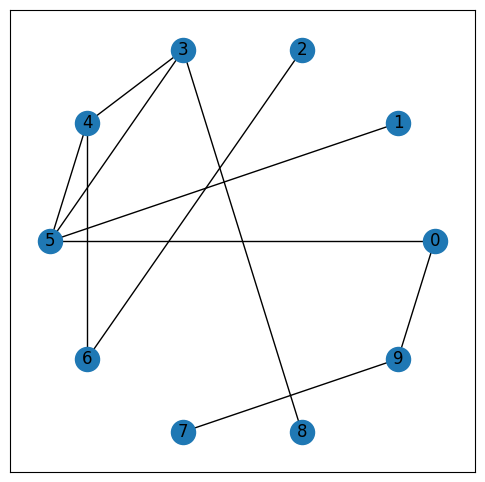

In [33]:
fig = plt.figure(figsize=(6,6))
graph = nx.gnp_random_graph(10,0.2)
nx.draw_networkx(graph,pos=nx.circular_layout(graph))
plt.savefig('ineff_graph.jpg')

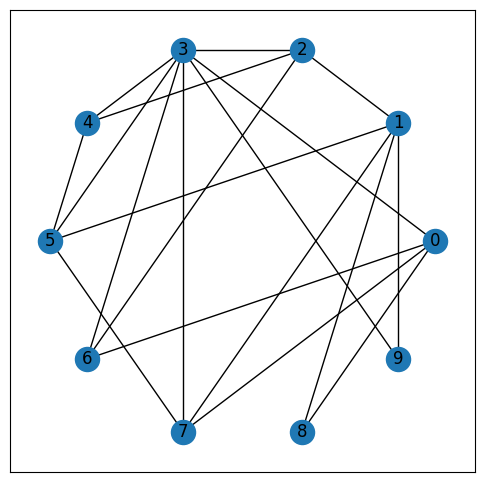

In [35]:
fig = plt.figure(figsize=(6,6))
graph = nx.gnp_random_graph(10,0.5)
nx.draw_networkx(graph,pos=nx.circular_layout(graph))
plt.savefig('eff_graph.jpg')